In [2]:
from google.colab import files
uploaded = files.upload()

Saving new_features_40.csv to new_features_40.csv


In [24]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.BytesIO(uploaded['new_features_40.csv']))
# Dataset is now stored in a Pandas Dataframe

In [27]:
data = df[['EVENT_CYCLES_F40','DISTINCT_ARTICLES_F40','PERCENT_GOOGLE_ARTICLES_F40','PERCENT_ARTICLE_CONTENT_F40','DAYS_TO_FORTY_EVENTS']]
labels = df[['REACHED_80_EVENTS']]
features = data.columns
data

,EVENT_CYCLES_F40,DISTINCT_ARTICLES_F40,PERCENT_GOOGLE_ARTICLES_F40,PERCENT_ARTICLE_CONTENT_F40,DAYS_TO_FORTY_EVENTS
0,6,8,0.250000,1.000000,70.0
1,4,1,0.000000,0.500000,30.0
2,2,4,0.000000,0.666667,7.0
3,4,2,0.500000,1.000000,42.0
4,8,2,0.000000,1.000000,112.0
...,...,...,...,...,...
20172,8,4,0.250000,1.000000,123.0
20173,4,3,0.000000,1.000000,29.0
20174,1,1,0.000000,1.000000,3.0
20175,1,7,0.000000,1.000000,1.0


In [28]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
data = scaler.fit_transform(data)

data

array([[ 0.9497783 ,  0.73527735, -0.02305593,  0.7675975 ,  0.70391353],
       [ 0.09513455, -1.1757997 , -0.7813534 , -1.10971409, -0.34482359],
       [-0.75950919, -0.35676668, -0.7813534 , -0.48394231, -0.94784744],
       ...,
       [-1.18683106, -1.1757997 , -0.7813534 ,  0.7675975 , -1.05272115],
       [-1.18683106,  0.46226635, -0.7813534 ,  0.7675975 , -1.10515801],
       [ 0.09513455,  1.82732138,  1.2407742 ,  0.47878062,  0.59903982]])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=82113)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(16141, 5) (4036, 5) (16141, 1) (4036, 1)


-0.24877680971418956
0.09997395034995282

0.11496084903092928
-0.04619839858228971

-0.13439615638545
0.05400871038236928

-0.08159514756782778
0.03278999051846893

-0.3750853873081372
0.15073257001252463



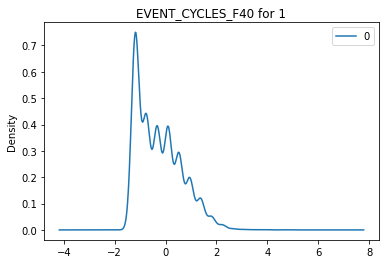

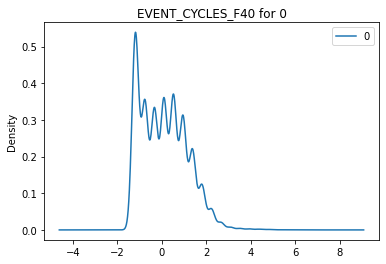

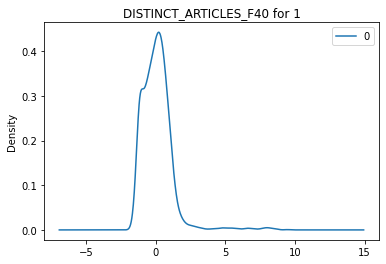

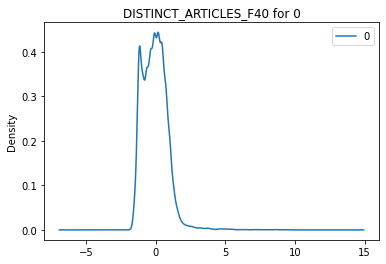

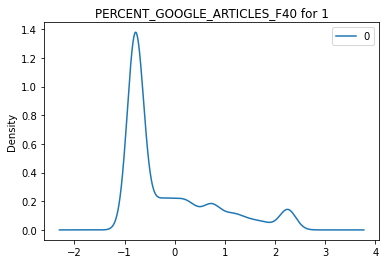

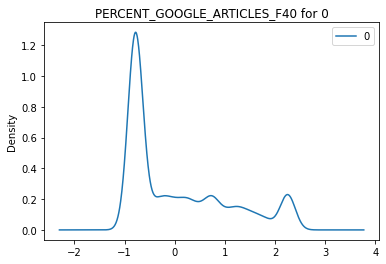

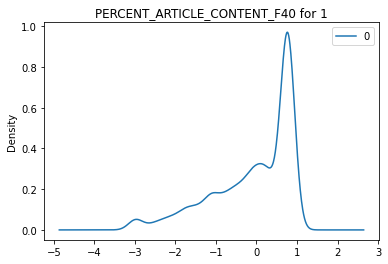

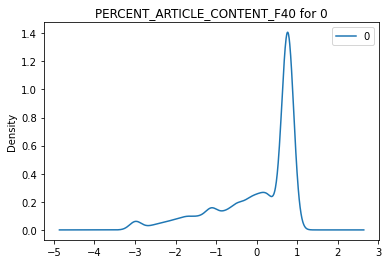

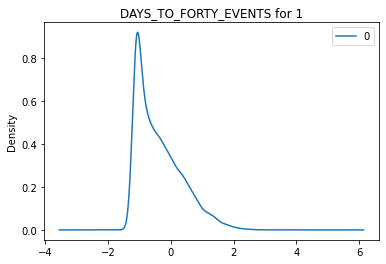

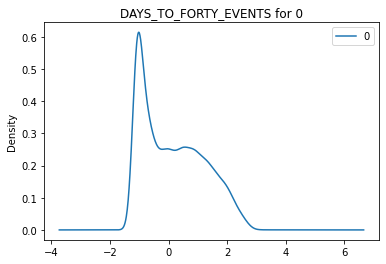

In [34]:
for i in range(5):
  
  pd.DataFrame(data[labels['REACHED_80_EVENTS'] == 1,i]).plot.kde(title = f'{features[i]} for 1')
  pd.DataFrame(data[labels['REACHED_80_EVENTS'] == 0,i]).plot.kde(title = f'{features[i]} for 0')
  print(data[labels['REACHED_80_EVENTS'] == 1,i].mean())
  print(data[labels['REACHED_80_EVENTS'] == 0,i].mean())
  print()


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

init = tf.keras.initializers.GlorotNormal()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=5, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=init),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init)
])

model.compile(
    loss='binary_crossentropy', 
    optimizer="adam", 
    metrics=['accuracy']
)

def plot_training(model):
  history = model.fit(
    X_train, y_train,
    verbose=0, 
    epochs=100, 
    batch_size=32,
    validation_data = (X_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, 
                                                verbose=0, restore_best_weights=True)]
  )

  _, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  _, test_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
  print('Train: %.2f, Test: %.2f' % (train_accuracy, test_accuracy))

  #print(history.history.keys())

  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Train: 0.73, Test: 0.72


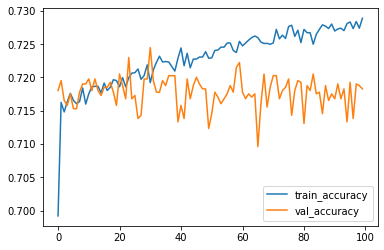

In [25]:
plot_training(model)